# Partial rFon1D Visualizations

Generating rFon1D visualizations. Easier to manipulate barplots.
Last updated: 8/4/22

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [30]:
# CHANGE THIS AS NEEDED PER EXPERIMENT
filename = "/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/server_ortho_seq_results/abeta_hydrophobicity7_first/complete_amyloid1_regressions.npz"
experiment = "abeta_hydrophobicity7_first"
orig_file = "complete_amyloid1"
dims = ["vPHOB", "PHOB", "NEUT", "PHIL"]
n_dim = len(dims)
sites = np.arange(0, 42)
# out_dir needs to exist previously
out_dir = (
    "/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/add_later_results/"
    + experiment
    + "_barplots/"
)

In [31]:
# SITES OF INTEREST, ZERO INDEXED
site_descr = "gatekeeper"
sites_of_interest = [0, 2, 6, 10, 16, 21, 41]
n_sois = len(sites_of_interest)
sites_of_interest

[0, 2, 6, 10, 16, 21, 41]

In [32]:
colors = [
    "tab:blue",
    "blueviolet",
    "saddlebrown",
    "tab:orange",
    "tab:green",
    "mediumvioletred",
    "coral",
    "tab:red",
    "tab:purple",
    "dodgerblue",
    "tab:brown",
    "gold",
    "tab:pink",
    "limegreen",
    "tab:gray",
    "chocolate",
    "tab:olive",
    "mediumvioletred",
    "goldenrod",
    "tab:cyan",
    "violet",
]

In [33]:
rFon1D_arr = np.load(filename)[orig_file + "_rFon1D"]
rFon1D_arr

array([[-0.5815991 ,  0.6815348 ,  1.07491935, -0.56065173],
       [-1.03694815, -0.15557898,  0.47102717,  0.68900913],
       [-0.24799138,  1.96119194, -0.42925587,  0.82467227],
       [-0.32699425,  0.36202572,  0.28377269,  0.        ],
       [-0.09542534,  0.        , -0.21559085,  0.16755826],
       [-0.61327009,  0.5523897 ,  0.03830384,  0.06395013],
       [ 0.0281707 ,  0.76390842,  0.53605202, -0.43549672],
       [ 0.1236027 ,  0.96769751, -0.73887187,  0.9975901 ],
       [-0.17421941, -0.86445011,  0.00663434,  0.54086771],
       [ 0.8885871 , -0.65265687,  0.62662202,  0.50750999],
       [ 1.12627409,  0.21514346, -0.86045825,  0.76995339],
       [-0.62540727,  0.68971216,  0.86261245,  0.47895702],
       [-0.0416519 ,  1.10123942,  0.27514481, -0.36355515],
       [ 1.23945024,  0.0545025 ,  0.57244512, -0.73833676],
       [ 0.40268135,  0.        , -0.20550567,  0.12266989],
       [-1.34219292,  0.        , -0.13085709,  0.53754277],
       [-0.58628947,  0.

In [34]:
rFon1D_interest = rFon1D_arr[sites_of_interest]
rFon1D_interest

array([[-0.5815991 ,  0.6815348 ,  1.07491935, -0.56065173],
       [-0.24799138,  1.96119194, -0.42925587,  0.82467227],
       [ 0.0281707 ,  0.76390842,  0.53605202, -0.43549672],
       [ 1.12627409,  0.21514346, -0.86045825,  0.76995339],
       [-0.58628947,  0.        ,  0.58628947,  0.        ],
       [ 0.41061745,  0.0279904 , -0.71847226,  0.94165862],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

## Generate plot

In [35]:
# constants that will be useful
width = 1 / n_sois
sd = n_sois * n_dim

In [36]:
def index_of_zeros(lst):
    zeros = []
    for i in range(len(lst)):
        if lst[i] == 0:
            zeros.append(i)
    return zeros

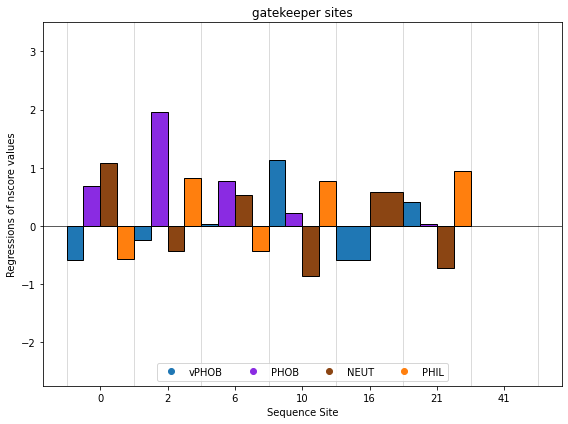

In [39]:
# set up the figure
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(n_sois + 1):
    ax.axvline(i, color="lightgray", linewidth=0.8, zorder=0)
ax.axhline(color="black", linewidth=0.64)


# draw bars onto the figure
for i in range(n_sois):
    curr_site = rFon1D_interest[i]
    zeros = index_of_zeros(curr_site)
    n_bars = n_dim - len(zeros)
    if n_bars != 0:
        bar_width = 1 / n_bars

        zero_count = 0
        for j in range(n_dim):
            if j not in zeros:
                curr_x = i + bar_width * (j - zero_count)
                curr_height = curr_site[j]
                ax.bar(
                    x=curr_x,
                    height=curr_height,
                    width=bar_width,
                    align="edge",
                    edgecolor="black",
                    zorder=3,
                    color=colors[j],
                )
            else:
                zero_count += 1

# legend
markers = [
    plt.Line2D([0, 0], [0, 0], color=color, marker="o", linestyle="")
    for color in colors[0:n_dim]
]
ax.legend(markers, dims, loc="best", ncol=n_dim, prop={"size": 10})

# x-ticks
ax.tick_params(width=0.8)
ax.set_xticks(np.arange(0, n_sois) + 0.5)
ax.set_xticklabels(sites_of_interest)

# labels
# ax.xaxis.label.set_size(20 - n_sois / 2)
plt.xlabel("Sequence Site")
plt.ylabel("Regressions of nscore values")

# set regression limits to make comparisons for different regions
plt.ylim(-2.75, 3.5)

# save figure
plt.title(site_descr + " sites")
plt.tight_layout()
plt.savefig(out_dir + experiment + "_" + site_descr + ".png", dpi=400)